In [ ]:
# Have a dataset consisting of 2000 individauls in which the goal is to predict whether or not
# they are approved for a loan based on certain features

# Variables include:
    # name, city, income, credit score, loan amount, years employed, points, loan_approved

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score

In [2]:
# Load data
df = pd.read_csv("loan_approval.csv")

In [4]:
# View first few rows of dataset
df.head()

,name,city,income,credit_score,loan_amount,years_employed,points,loan_approved
0,Allison Hill,East Jill,113810,389,39698,27,50.0,False
1,Brandon Hall,New Jamesside,44592,729,15446,28,55.0,False
2,Rhonda Smith,Lake Roberto,33278,584,11189,13,45.0,False
3,Gabrielle Davis,West Melanieview,127196,344,48823,29,50.0,False
4,Valerie Gray,Mariastad,66048,496,47174,4,25.0,False


In [5]:
# View last 5 rows of dataset
df.tail()

,name,city,income,credit_score,loan_amount,years_employed,points,loan_approved
1995,James Schaefer,Robertton,92163,770,12251,13,85.0,True
1996,Diana Lin,New Frank,38799,635,48259,17,40.0,False
1997,Brandon Meyer,East Haley,41957,763,16752,5,60.0,True
1998,Jason Price,Adamland,139022,360,24031,35,55.0,False
1999,Nicole Brown,New Nathantown,41188,482,31397,6,20.0,False


In [6]:
# Check contents/structure of dataset
df.info()

# Have 5 numeric datatypes, 2 character/object datatypes and 1 boolean datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            2000 non-null   object 
 1   city            2000 non-null   object 
 2   income          2000 non-null   int64  
 3   credit_score    2000 non-null   int64  
 4   loan_amount     2000 non-null   int64  
 5   years_employed  2000 non-null   int64  
 6   points          2000 non-null   float64
 7   loan_approved   2000 non-null   bool   
dtypes: bool(1), float64(1), int64(4), object(2)
memory usage: 111.5+ KB


In [7]:
# Look at the shape of data
df.shape

# Have 2000 observations/ individuals (rows) and 8 variables (columns)

(2000, 8)

In [8]:
# Check for missing values
print(df.isnull().sum())

# Have 0 missing values

print()

# Check for any duplicates
print(df.duplicated().sum())

# There are no duplicated values in dataset

name              0
city              0
income            0
credit_score      0
loan_amount       0
years_employed    0
points            0
loan_approved     0
dtype: int64

0


In [9]:
# View summary statistics of numeric values
df.describe().round(0)

,income,credit_score,loan_amount,years_employed,points
count,2000.0,2000.0,2000.0,2000.0,2000.0
mean,90586.0,574.0,25309.0,20.0,57.0
std,34488.0,161.0,14207.0,12.0,19.0
min,30053.0,300.0,1022.0,0.0,10.0
25%,61296.0,433.0,12749.0,10.0,45.0
50%,90388.0,576.0,25662.0,21.0,55.0
75%,120100.0,715.0,37380.0,31.0,70.0
max,149964.0,850.0,49999.0,40.0,100.0


In [ ]:
# Income: avg income is $90,586. with income ranging from $30,053.00 to $ 149,964
# Credit Score: avg credit score is 574 with scores ranging from 300 to 850
# Loan Amount: avg loan amount is $25,309 with loans ranging from $1,022 to $49,999
# Years Employed: avg years employed is 20 years with years ranging from 0 to 40 years
# Points: avg points is 57.0 with points ranging from 10 to 100

In [3]:
# Make copy of dataframe so that old dataset will not be modified
df_new = df.copy()

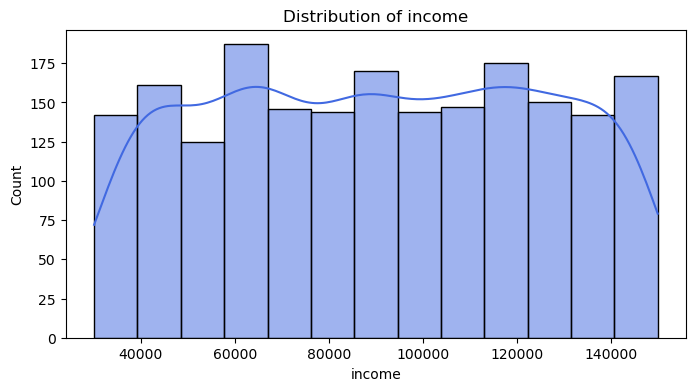

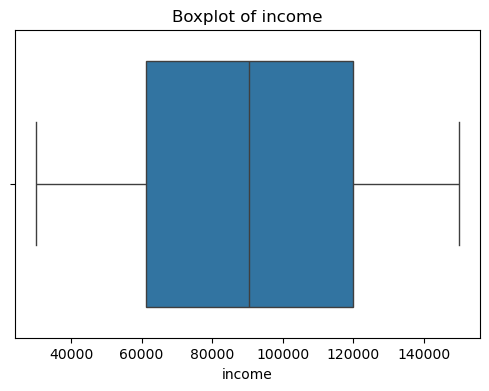

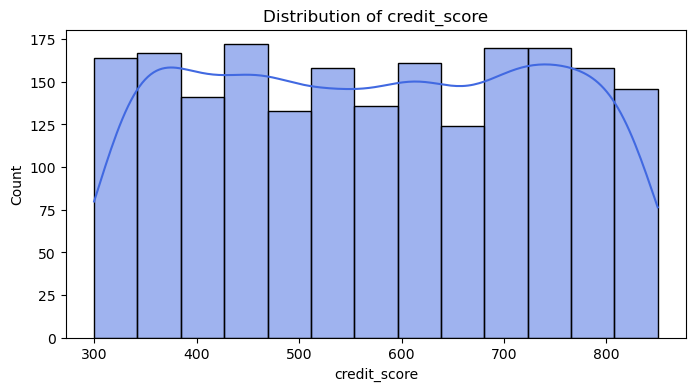

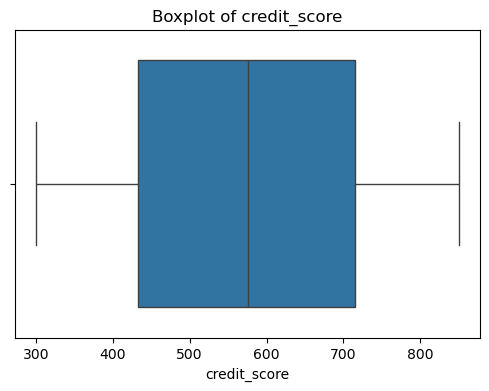

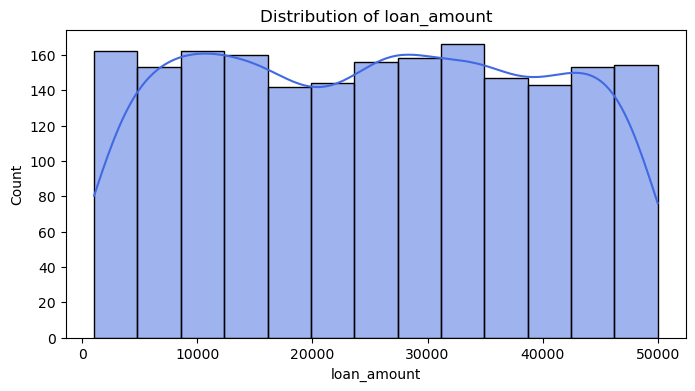

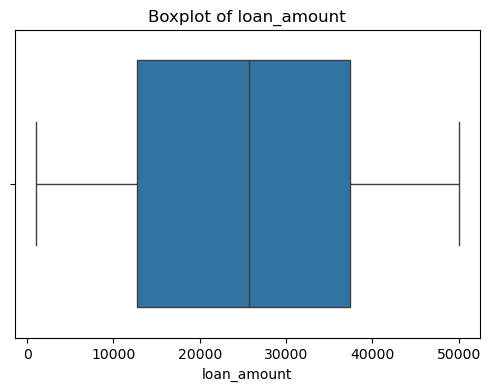

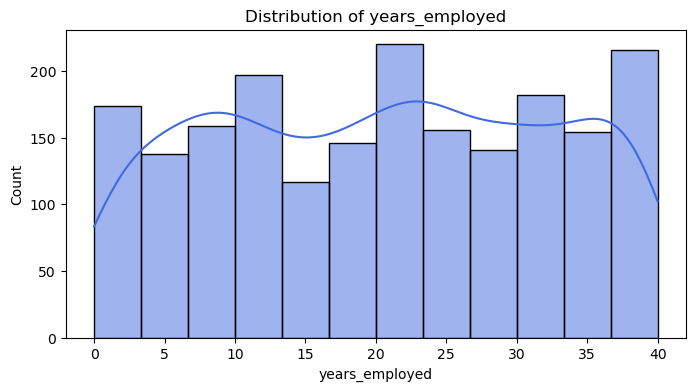

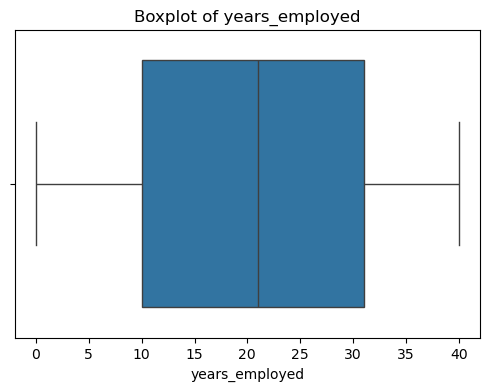

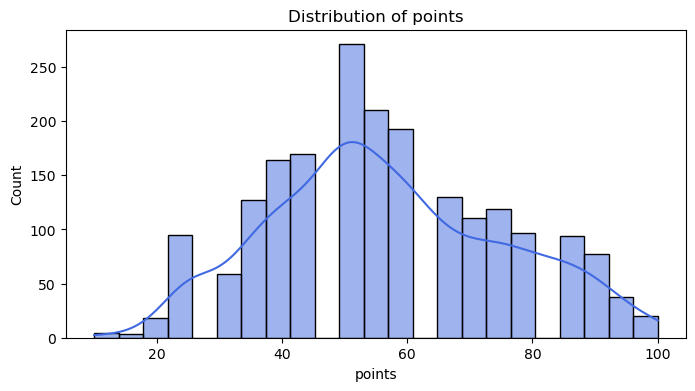

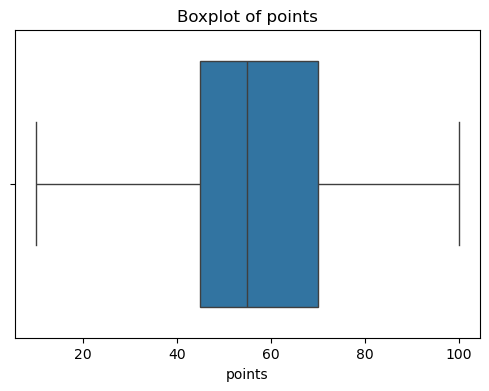

In [4]:
# Let's look at the distributions of numeric cols
num_cols = df_new.select_dtypes(include=['int64', 'float64']).columns

for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df_new[col], kde=True, color="royalblue")
    plt.title(f"Distribution of {col}")
    plt.show()

    # View boxplots of numeric variables
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df_new[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


In [24]:
# Let's look at the counts for loan_approved
print(df_new['loan_approved'].value_counts())

# So we see that out of 2000 individuals, 1,121 (56.1%) of were not approved for loan

loan_approved
False    1121
True      879
Name: count, dtype: int64


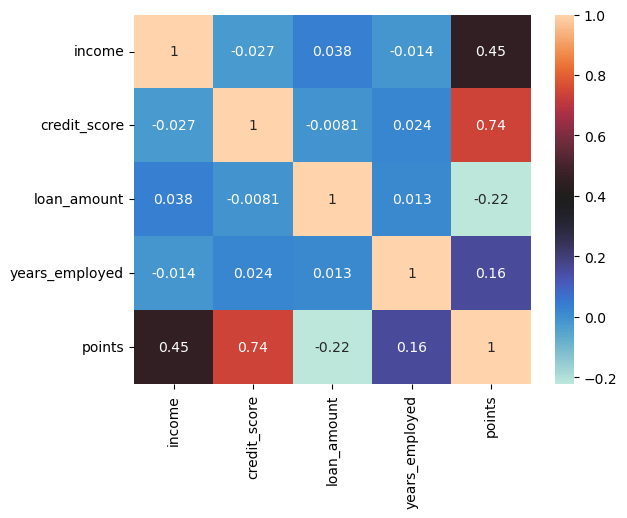

In [13]:
# Let's see if the numeric variables are correlated with one another
corr = df_new[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='icefire')
plt.show()

# We see that credit_score and points are strongly correlated together (0.74)
# Other than that the numeric variables do not have much correlation with each other.

In [5]:
# Since we want to predict loan approved and being that it is boolean let's convert from 
# boolean to numeric where we want True/Loan Approved = 1 and False/Loan Denied  = 
# Create mapping dictonary
mapping = {True: 1, False: 0}

df_new['loan_approved'] = df_new['loan_approved'].map(mapping)

In [6]:
# view loan_approved column to see if mapping worked
df_new.head(6)

,name,city,income,credit_score,loan_amount,years_employed,points,loan_approved
0,Allison Hill,East Jill,113810,389,39698,27,50.0,0
1,Brandon Hall,New Jamesside,44592,729,15446,28,55.0,0
2,Rhonda Smith,Lake Roberto,33278,584,11189,13,45.0,0
3,Gabrielle Davis,West Melanieview,127196,344,48823,29,50.0,0
4,Valerie Gray,Mariastad,66048,496,47174,4,25.0,0
5,Darren Roberts,Port Jesseville,62098,689,19217,29,65.0,1


In [7]:
# Drop name and city from dataframe
cols_drop = ['name', 'city']
df_new.drop(columns=cols_drop, inplace=True)

In [8]:
# Perform Logistic Regression
np.random.seed(42)

# Select Features and Target
X = df_new.drop('loan_approved', axis=1)
y = df_new['loan_approved']

# Show the shape of features and target
print("Shape:", X.shape, y.shape)

Shape: (2000, 5) (2000,)


In [9]:
# Can do logistic model on entire dataset but we are going to use train and test sets for this
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state=42, stratify=y
)

print(f"\nTraining samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")

# We have 1600 training samples and 400 testing samples


Training samples: 1600, Testing samples: 400


In [10]:
# Standardize Features 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
# Fit Logistic Regression Model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [12]:
# Make Predictions

# Predict class labels
y_pred = model.predict(X_test_scaled)

# Predict probabilities for Loan approved (True)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

# Display probabilities
print(f"Predicted Probabilites (Loan Approval):\n{y_prob}")

Predicted Probabilites (Loan Approval):
[7.71424175e-01 2.05867632e-06 9.95226383e-01 9.99961967e-01
 2.01464415e-06 1.00000000e+00 7.58053847e-03 9.99998851e-01
 1.21152015e-01 1.96276811e-06 9.92516544e-01 2.41715097e-06
 9.99408889e-01 6.22382630e-04 9.99999915e-01 9.99948878e-01
 1.61944946e-05 9.99999863e-01 9.17031152e-09 4.30460812e-05
 9.89546533e-01 1.79317657e-01 2.77823564e-03 3.70992434e-04
 1.94841856e-06 2.47097539e-07 9.99999917e-01 9.99456377e-01
 9.84904865e-01 9.99975248e-01 7.24169720e-04 9.99999918e-01
 9.94673009e-02 9.79742305e-01 3.29689638e-05 9.85605303e-01
 1.12699471e-02 9.79856065e-04 9.99999150e-01 9.99968525e-01
 8.32828209e-01 9.99954709e-01 2.66753565e-06 9.83222553e-01
 9.99952658e-01 8.96033034e-01 8.54864619e-01 9.99999914e-01
 5.47932076e-04 2.12606659e-05 1.71668246e-06 6.40618207e-09
 9.99967752e-01 8.28251904e-01 2.76019840e-09 7.59660118e-03
 2.45480838e-01 9.99516559e-01 9.82515472e-01 5.37569497e-04
 5.04929905e-03 9.21226422e-01 4.40680063e-03

In [13]:
# Choose classification threshold
threshold = 0.5

# Classify based on threshold
y_pred_threshold = (y_prob >= threshold).astype(int)

# Create Dataframe to hold results/ this is the test set
loan_results = pd.DataFrame({
    'Actual Loan-Approval': y_test,
    'Predicted Loan-Approval': y_pred,
    'Predicted Probabilities': y_prob
})

In [14]:
# View first 20 observations
loan_results.head(21)

,Actual Loan-Approval,Predicted Loan-Approval,Predicted Probabilities
916,1,1,7.714242e-01
795,0,0,2.058676e-06
1850,1,1,9.952264e-01
1333,1,1,9.999620e-01
1081,0,0,2.014644e-06
1622,1,1,1.000000e+00
434,0,0,7.580538e-03
1750,1,1,9.999989e-01
666,0,0,1.211520e-01
195,0,0,1.962768e-06


In [15]:
# Let's put original dataframe labels into Test Set Dataframe for clean view 

# Identify categorical columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns

# Get categorical columns for test set
X_test_cats = df.loc[X_test.index, cat_cols]

# Ensure X_test is a DataFrame
X_test_num = pd.DataFrame(X_test, columns=X.columns, index=X_test.index)

# Combine everything
loan_results_full = pd.concat(
    [X_test_cats, X_test_num, loan_results],
    axis=1
)

# This corrects display of dataframe columns
pd.set_option('display.max_columns', None)      # show all columns
pd.set_option('display.width', None)            # don't wrap long lines
pd.set_option('display.max_colwidth', None)     # show full content in each cell
pd.set_option('display.expand_frame_repr', False)  # stop printing with '\'


loan_results_full.head()

,name,city,income,credit_score,loan_amount,years_employed,points,Actual Loan-Approval,Predicted Loan-Approval,Predicted Probabilities
916,Sherry Stevens,Lake Christophermouth,100008,655,46895,19,60.0,1,1,0.771424
795,James Thompson,Davisborough,62662,466,26460,25,35.0,0,0,0.000002
1850,Victoria Padilla,Keithland,36629,838,15315,11,65.0,1,1,0.995226
1333,Michael Wilcox,Waltersmouth,105529,698,32169,35,75.0,1,1,0.999962
1081,Katie Baker,New Tiffanyton,53834,550,46858,35,35.0,0,0,0.000002


In [16]:
# Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix: \n{conf_matrix}")
print(f"Classification Report: \n{class_report}")

# Model has 100% Accuracy at predicting True Loan Approval's  and True Loan Denials

# If we used the dataset without standardizing the features these values would be different 
# and accuracy would not be as high

Accuracy: 1.0
Confusion Matrix: 
[[224   0]
 [  0 176]]
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       224
           1       1.00      1.00      1.00       176

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



<function matplotlib.pyplot.show(close=None, block=None)>

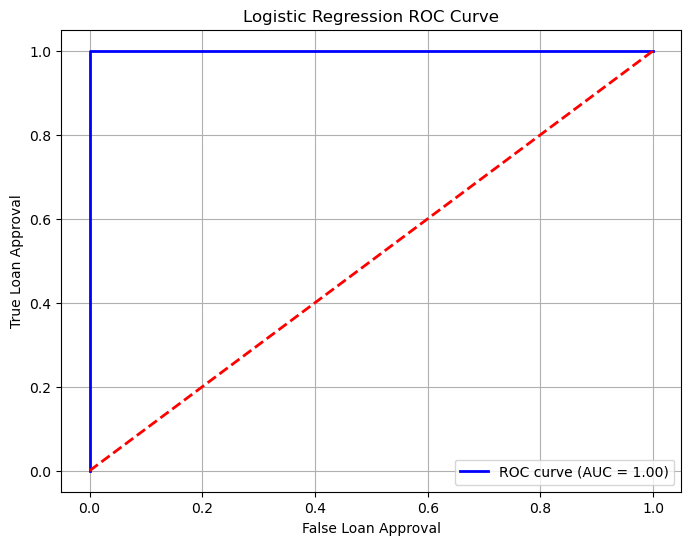

In [ ]:
# Let's look at ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel("False Loan Approval")
plt.ylabel("True Loan Approval")
plt.title("Logistic Regression ROC Curve")
plt.legend(loc='lower right')
plt.grid(True)
plt.show

# Curve is saying that this model is 100%/perfect at distingushing between 
# people who are approve and denied for loan

In [58]:
## Let's Finally look at the coefficients of the model
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})

print("\nLogistic Regression Coefficients:")
print(coef_df)

print("\nIntercept:", model.intercept_[0])


Logistic Regression Coefficients:
          Feature  Coefficient
0          income     0.123928
1    credit_score     0.798273
2     loan_amount    -0.335645
3  years_employed     0.088117
4          points    10.129185

Intercept: -0.4130272337301367


In [ ]:
# Logistic Regression Equation: Loan Approval = -0.413 + 0.12*income + 0.79*credit_score +
# -0.34*loan_amount + 0.088*years_employed + 10.13*points